# Module 4 Project: Financial Instrument Time Series Analysis - Non-Techincal Notebook
## Andrew Cole

## 1) Import Necessary Libraries

The main objective here is to provide the prospective stakeholder, a small-market wealth management advisory company, with statistical insight on past and future performance of potential investments. A financial vehicle, the XLV Healthcare mutual fund (ticker symbol: XLV), was selected for further analysis. 

A full Time Series analysis is conducted to look at the historic performance of the XLV as well as to forecast it's movement into the future. By taking in the historic information and movement of the closing prices of the XLV dating back 21 years to the end of 1998, we can look at past movements combined with TS modeling to create an accurate and confident projection of future prices. Multiple time series models with varying parameters were tested and compared to each other. After these comparisons a single model was selected and then the XLV data was fit to the selected model for forecasting of the future XLV closing prices. 

In [52]:
# Here we are importing the necessary Python libraries which we will use to gather necessary data, perform operations and transformations of the data,
# create visualizations, and model the different Time Series

import ticker_cleaner
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as TS
import warnings
from IPython.display import Image

%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2) Assemble Historical Data & Visualize 

The first thing we will do is gather the necessary historic financial information for the XLV mutual fund. Data was collected from Yahoo Finance. The Data will date back to December of 1998 and continue until present day. Once we have the necessary information we will re-group the data into monthly averages of the closing price. These monthly averages will then be visualized in a graph which will show us the historic movement of average monthly closing prices of the XLV fund.

In [42]:
# Using the Helper.py module to gather the XLV Yahoo Finance data and transform it into a DataFrame with operable features. 
# This is the basis for all operations completed on XLV data. 
# The output is a snapshot of the first five financial record entries (monthly average closing prices) as well as the five most recent.

xlv_monthly_mean = ticker_cleaner.yahoo_finance_clean('XLV')
xlv_monthly_mean

,Close
Date,
2020-01-01,101.848000
2019-12-01,100.354762
2019-11-01,95.596500
2019-10-01,90.148696
2019-09-01,89.694500
...,...
1999-04-01,21.752857
1999-03-01,20.773913
1999-02-01,20.173684


Below we can visualize the movement of these closing prices over time. We see that there is a very large increase (almost 450%) since the fund's first input close price. We notice that there is an upwards trend, so we will investigate further as to what is going on over time with the closing price.

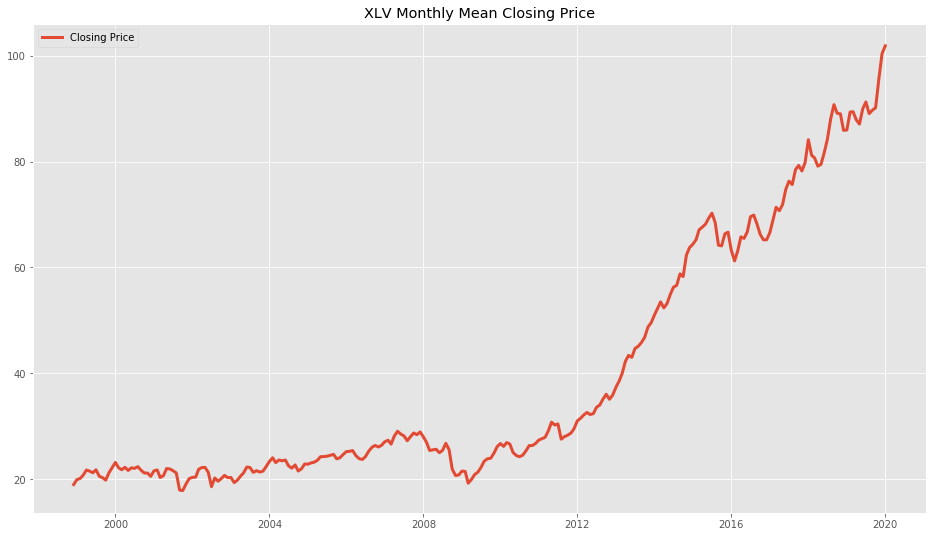

<Figure size 432x288 with 0 Axes>

In [51]:
warnings.filterwarnings(action='always')
plt.style.use('ggplot')
fig = plt.figure(figsize = (16,9))
plt.plot(xlv_monthly_mean, linewidth = 3, label = 'Closing Price')
plt.title('XLV Monthly Mean Closing Price')
plt.legend()
plt.show()
plt.savefig('XLV_beginning_close_price')

## 3) Decomposing the Fund

We will now decompose the XLV's movement of closing price to check for trends, seasonality, and residual distributions. Most Time Series models operate under the assumption that the properties are stationary (constant) over time. Basically, the mean and variance of the series should not actually be a function of time. We will perform a decomposition function to separate trend, seasonality, and residual distributions from the XLV movements to get a better understanding of what is going on. 

In [53]:
decomposition = seasonal_decompose(np.log(xlv_monthly_mean))